In [1]:
%matplotlib inline

from py4xs.local import ExpPara
from py4xs.data2d import Data2d,Axes2dPlot,DataType
import numpy as np
import pylab as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')

## Setting up ExpPara and Mask
This is how the ExpPara structure for a detector is defined:

In [2]:
ep = ExpPara(619, 487)    # 

ene = 10790.6
wl = 2.*np.pi*1973/ene

ep.wavelength = wl
ep.det_orient = 0.
ep.det_tilt = -26.
ep.det_phi = 0.
ep.bm_ctr_x = -141.
ep.bm_ctr_y = 328.3
ep.ratioDw = 2.86
ep.grazing_incident = False
ep.flip = 1
ep.incident_angle = 2.0
ep.sample_normal = 0

ep.calc_rot_matrix()
ep.init_coordinates()

ep.mask.read_file("data/Sol-mask.WAXS1")

Associating the ExpPara to a scattering pattern saved in a CFB file.

In [3]:
# data from Pilatus 300K
dw1 = Data2d("data/Sol-b_000018_WAXS1.cbf")
dw1.set_exp_para(ep)

Displaying the scattering patten using the Axes2dPlot class. Note that the mask is used to block of some sharp feature that may be due to the mica vacuum windows or hot detector pixels.

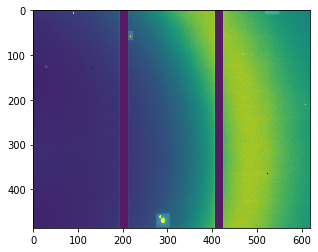

In [4]:
plt.figure()
ax = plt.gca()
paxr = Axes2dPlot(ax, dw1.data, exp=ep)
# plotting the data twice with and without mask to show how well the mask works
paxr.plot(showMask=True)
paxr.coordinate_translation="xy2qphi"
# the following operation only affect the most recent plot??
paxr.img.set_clim(0,14000)
plt.show()

<br>
## Azimuthal average
Calculating the azimuthal average of the scattering pattern. The $q$-grid does not need to have a constant spacing. The resulting intensity is adjusted based on the local bin width.

In [5]:
qgrid = np.hstack((np.arange(0.005, 0.0499, 0.001),
                   np.arange(0.05, 0.0999, 0.002),
                   np.arange(0.1, 0.4999, 0.005),
                   np.arange(0.5, 0.9999, 0.01),
                   np.arange(1.0, 3.2,0.03)))

In [6]:
(Iq,dI) = dw1.conv_Iq(qgrid, mask=ep.mask)

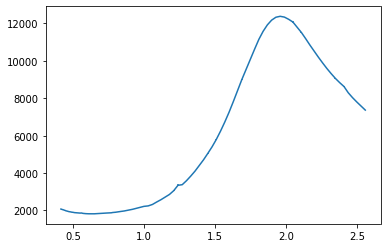

In [7]:
plt.figure()
plt.errorbar(qgrid, Iq, dI)
plt.show()

<br>
## Coordinates conversion
Now convert the scattering data into a *q-phi* intensity map, display the map, and annotate the map by a point marker and some line markers at constant coordinates:

In [8]:
dw1.conv_Iqphi(500, 240, mask=ep.mask)

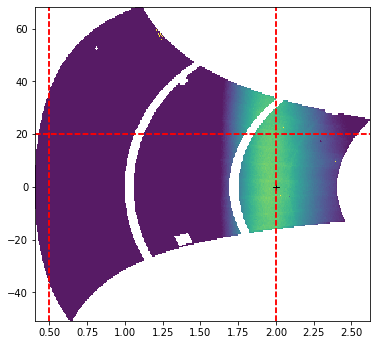

In [9]:
plt.figure(figsize=(6,6))
ax = plt.gca()
paxr = Axes2dPlot(ax,dw1.qphi_data)
paxr.plot(aspect=np.radians(1.))
#paxr.set_color_scale(mpl.cm.gist_yarg)
paxr.img.set_clim(8000,14000)
paxr.mark_points([2.0], [0], "k+")
paxr.mark_coords([0.5, 2.0], [20], "r--")
paxr.draw_dec()
plt.show()

<br>
## Line cuts
Extract a region-of-interest (ROI) and squash the data into a line profile:

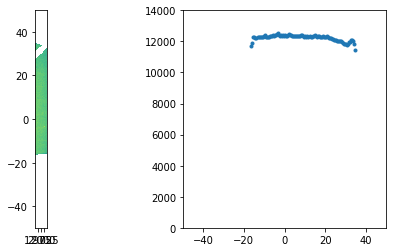

In [10]:
ret = dw1.qphi_data.roi(1.95, 2.05, -50, 50)

plt.figure(figsize=(8,4))
plt.subplot(121)
ax = plt.gca()
paxr = Axes2dPlot(ax,ret)
paxr.plot(aspect=np.radians(1.))
paxr.img.set_clim(8000,14000)
plt.subplot(122)
plt.plot(ret.yc, ret.flatten(axis=1), ".")
plt.xlim([ret.yc[0], ret.yc[-1]])
plt.ylim([0, 14000])
plt.show()

##<br>
ROI and line cut in the horizontal direction:

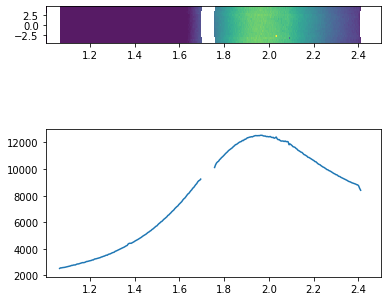

In [11]:
ret = dw1.qphi_data.roi(1.0, 2.5, -5, 5)

plt.figure(figsize=(6,6))
plt.subplot(211)
ax = plt.gca()
paxr = Axes2dPlot(ax,ret)
paxr.plot(aspect=np.radians(1.))
paxr.img.set_clim(8000,14000)
plt.subplot(212)
plt.plot(ret.xc, ret.flatten(axis=0))
plt.xlim([ret.xc[0], ret.xc[-1]])
plt.show()